In [1]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [3]:
weight_init_types = {
    'std=0.01': 0.01,
    'Xavier': 'sigmoid',
    'He': 'relu',
}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(
                        input_size=784,
                        hidden_size_list=[100, 100, 100, 100],
                        output_size=10,
                        weight_init_std=weight_type,
    )
    train_loss[key] = []

In [4]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
        
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
        
    if i % 100 == 0:
        print('========== iter: %d =========' % i)
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ':' + str(loss))

========== iter: 0 =========
std=0.01:2.30256464264
Xavier:2.30507644897
He:2.43648722061
========== iter: 100 =========
std=0.01:2.30264283056
Xavier:2.20614231216
He:1.57612371672
========== iter: 200 =========
std=0.01:2.30139251773
Xavier:1.97783571356
He:0.789076053227
========== iter: 300 =========
std=0.01:2.30106540078
Xavier:1.49606842962
He:0.576452231657
========== iter: 400 =========
std=0.01:2.30292231222
Xavier:1.0966765022
He:0.521330148197
========== iter: 500 =========
std=0.01:2.30408264046
Xavier:0.761680369545
He:0.395056830971
========== iter: 600 =========
std=0.01:2.29819798095
Xavier:0.505950993649
He:0.31349082133
========== iter: 700 =========
std=0.01:2.29714732872
Xavier:0.499264892894
He:0.302371384558
========== iter: 800 =========
std=0.01:2.30131894607
Xavier:0.448223599369
He:0.323449499323
========== iter: 900 =========
std=0.01:2.30037324453
Xavier:0.442934866714
He:0.310157368889
========== iter: 1000 =========
std=0.01:2.29694586853
Xavier:0.4126809

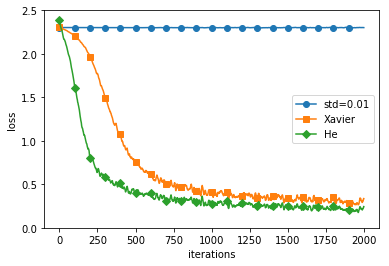

In [5]:
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(
        x,
        smooth_curve(train_loss[key]),
        marker=markers[key],
        markevery=100,
        label=key,
    )
plt.xlabel('iterations')
plt.ylabel('loss')
plt.ylim(0, 2.5)
plt.legend()
plt.show()